In [1]:
%matplotlib notebook
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import random, scipy
from ifitpy import Fitter
from ifitpy import Functions
from ifitpy import Utils

In [2]:
f = Fitter("linear") #linear, expo, gaussian, gaussian2d, poly

# This fit package permits to, well, fit a given x,y data. It encapsulates both iminuit and curve_fit. 
# There are two type of functions. Simple (linear, expo) and Complex(gaussian, gaussian2d, poly).

# For Simple function fit(x,y) are fit(x,y,p0) are valid inputs. 
# In the first option the fit attempts to estimate the initial starting point 
# In the second option a list of parameters (p0) is used to innitilized the fit

# For Complex functions fit(x,y, n) are fit(x,y,p0) are valid inputs. 
# If n us used then the algorithm will use this value to generate the fitting function with n components
# For example, fit(xx,yy,n=3) will fit a sum of two gaussian(2d) or a 3-degree polinom. And p0 zero is also estimated.
# If fit(x,y,n,p0) p0 will be the innitialization parameters. Note that len(p0) = n*parameters_to_fit.

#There's also a f.fitBinned(xx,yy,bins=50) option which allows to fit a profile histogram instead of the raw data.
#This option is often faster and the recomended one as it takes into account the statistical fluctuation of the data.

#To extract the fit results use

f.fit([0,10], [0,-10])
p = f.getParams()
print(p) # prints a string with the available variables.
print(p.vars) # list of the results
print(p.m) # slope for the "linear" type
print(p.b) # slope for the "intercept" type

#Use f.evaluate(xx) to evaluate the function, like for plotting and such
print(f.evaluate([20]))

vars: [-1.0, 0.0], m: -1.0, b: 0.0
[-1.0, 0.0]
-1.0
0.0
[-20.]


/home/guilherme/.local/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:881: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


<IPython.core.display.Javascript object>


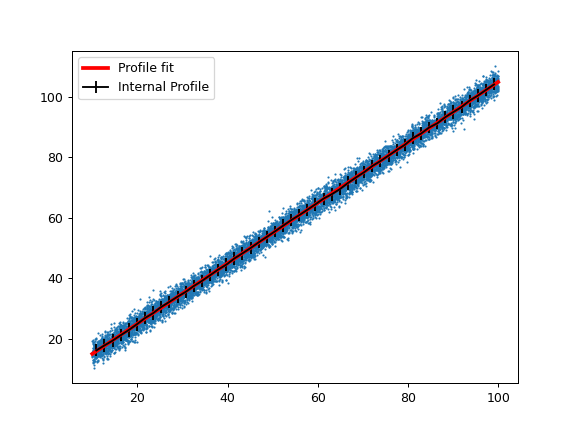

1.0002144530157695 4.958969369228897
Chi2 =  0.0
1.0003556800965514 4.952792321301856
Chi2 =  0.0


In [3]:
m, b = 1,0
xx = np.arange(10,100,0.01)
yy = xx*m+b + np.random.normal(5, 2, size = xx.shape)


fig = plt.figure()
plt.scatter(xx, yy,s=0.5)

f = Fitter("linear")
f.fit(xx,yy)
p = f.getParams()
print(p.m,p.b)
print("Chi2 = ",f.chi2/f.dof)

plt.plot(xx, xx*p.m+p.b, c="orange")


f = Fitter("linear")
f.fitBinned(xx,yy,bins=50)
p = f.getParams()
print(p.m,p.b)
print("Chi2 = ",f.chi2/f.dof)

plt.errorbar(f.profx, f.profy, yerr=f.profyrr, c="black", label="Internal Profile")
plt.plot(xx,f.evaluate(xx), c="red", label="Profile fit", lw=3)
plt.legend()

<IPython.core.display.Javascript object>


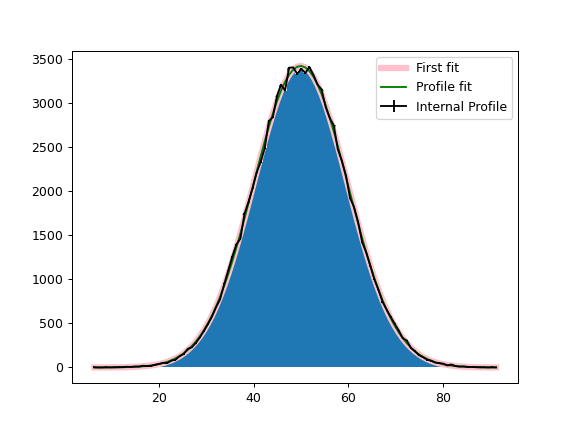

Chi2 =  0.0
[3424.0940042310153, 49.913340807577185, 9.993451342679899]
2: Chi2 =  0.0
vars: [3424.039023240401, 49.915205073315086, 9.99458083836776], amp: 3424.039023240401, mean: 49.915205073315086, sigma: 9.99458083836776
Mean is:  49.915205073315086
Sigma is:  9.99458083836776
Amplitude is:  3424.039023240401
[3424.039023240401, 49.915205073315086, 9.99458083836776]


In [4]:
mu, sig = 50,10
yyt = np.random.normal(mu, sig, size = 100000)

fig = plt.figure()
res = plt.hist(yyt, bins=100)

yy = res[0]
xx = (res[1][:-1]+res[1][1:])*0.5

f = Fitter("gaussian")
f.fit(xx, yy)
plt.plot(xx,f.evaluate(xx), c="pink", label="First fit", lw=5)

p = f.getParams()
print("Chi2 = ",f.chi2/f.dof)
print(p.vars)


f = Fitter("gaussian")
f.fitBinned(yyt,bins=100)
p = f.getParams()
print("2: Chi2 = ",f.chi2/f.dof)
print(p)
print("Mean is: ", p.mean)
print("Sigma is: ", p.sigma)
print("Amplitude is: ", p.amp)
print(p.vars)

plt.errorbar(f.profx, f.profy, yerr=f.profyrr, c="black", label="Internal Profile")
plt.plot(xx,f.evaluate(xx), c="green", label="Profile fit")

plt.legend()

<IPython.core.display.Javascript object>


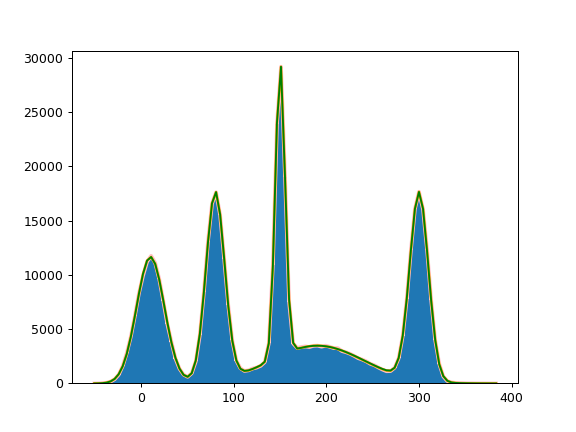

<ValueView x0=11653.66437651436 x1=10.004696462352141 x2=15.005762823727997 x3=17353.201208606388 x4=79.98363764113397 x5=10.067400620037693 x6=26995.747899113918 x7=150.03768458987935 x8=5.198255093540658 x9=3482.718640152763 x10=190.1763508666477 x11=50.19488352478308 x12=17332.394996745876 x13=300.0389241408848 x14=10.074472721888974>
vars: [11653.66437651436, 10.004696462352141, 15.005762823727997, 17353.201208606388, 79.98363764113397, 10.067400620037693, 26995.747899113918, 150.03768458987935, 5.198255093540658, 3482.718640152763, 190.1763508666477, 50.19488352478308, 17332.394996745876, 300.0389241408848, 10.074472721888974], amp_0: 11653.66437651436, mean_0: 10.004696462352141, sigma_0: 15.005762823727997, amp_1: 17353.201208606388, mean_1: 79.98363764113397, sigma_1: 10.067400620037693, amp_2: 26995.747899113918, mean_2: 150.03768458987935, sigma_2: 5.198255093540658, amp_3: 3482.718640152763, mean_3: 190.1763508666477, sigma_3: 50.19488352478308, amp_4: 17332.394996745876, me

In [5]:
from scipy.interpolate import UnivariateSpline


mu, sig = 20,10
m2 = np.array(np.random.normal(10, 15, size = 100000))
m1 = np.array(np.random.normal(80, 10, size = 100000))
m3 = np.array(np.random.normal(300, 10, size = 100000))
m4 = np.array(np.random.normal(190, 50, size = 100000))
m5 = np.array(np.random.normal(150, 5, size = 80000))

yyt = np.concatenate((m2, m1,m3,m4, m5))
fig = plt.figure()

res = plt.hist(yyt, bins=100)
yy = res[0]
xx = (res[1][:-1]+res[1][1:])*0.5
plt.plot(xx,yy,c="pink",lw=3)


gauss_to_find = 5
f = Fitter("gaussian")
f.fit(xx,yy,n=gauss_to_find)
p = f.getParams()
print(f.par)
print(p)
plt.plot(xx,f.evaluate(xx), c="orange", lw=2, label="unbinned")

#fit finned
f = Fitter("gaussian")
f.fitBinned(yyt,bins=100,n=gauss_to_find)
p = f.getParams()
print("Chi2 = ",f.chi2/f.dof)
print(p)


plt.plot(xx,f.evaluate(xx), c="green", label="binned")

<IPython.core.display.Javascript object>


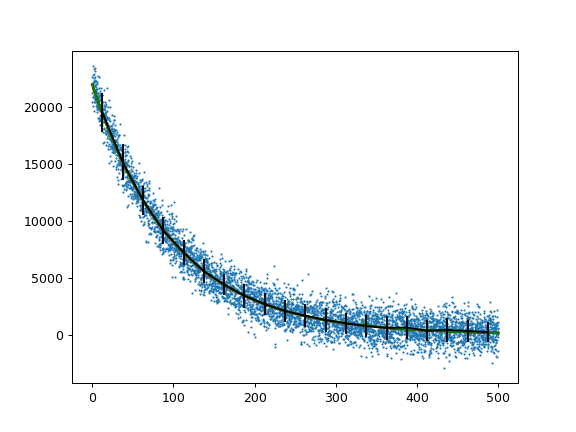

<ValueView p0=9.999474087402668 p1=-0.009965739706136966>
vars: [9.999474087402668, -0.009965739706136966], p0: 9.999474087402668, p1: -0.009965739706136966
vars: [10.000192252943958, -0.009936034206155056], p0: 10.000192252943958, p1: -0.009936034206155056


<ErrorbarContainer object of 3 artists>

In [6]:
p0, p1 = 10, -0.01
xx = np.arange(0,500,0.1)
yy = np.exp(p0+p1*xx) +np.random.normal(50, 1000, size = xx.shape)

fig = plt.figure()
plt.scatter(xx, yy,s=0.5)


f = Fitter("expo")
f.fit(xx,yy)
p = f.getParams()
print(f.par)
print(p)
plt.plot(xx, f.evaluate(xx),color="r",lw=2)



f = Fitter("expo")
f.fitBinned(xx,yy,bins=20)
p = f.getParams()
print(p)
plt.plot(xx, f.evaluate(xx),color="g",lw=2)
plt.errorbar(f.profx, f.profy, yerr=f.profyrr, c="black", label="Internal Profile")

/tmp/ipykernel_2542/1842171329.py:5: RuntimeWarning: covariance is not positive-semidefinite.
  pts = numpy_2d([0, 0], cov, size=10000)


<IPython.core.display.Javascript object>


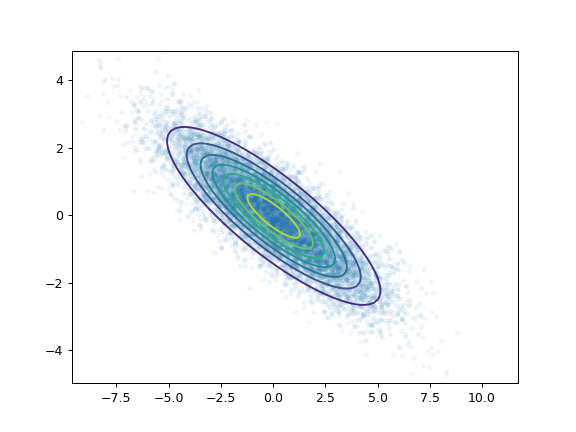

<ValueView x0=0.031422010567486655 x1=-0.01918341595152703 x2=2.746771062360282 x3=0.6369712007857207 x4=1.1959792399035645 x5=0.43478449607569036>
vars: [0.031422010567486655, -0.01918341595152703, 2.746771062360282, 0.6369712007857207, 1.1959792399035645, 0.43478449607569036], x0_0: 0.031422010567486655, y0_0: -0.01918341595152703, sigma_x_0: 2.746771062360282, sigma_y_0: 0.6369712007857207, amp_0: 1.1959792399035645, theta_0: 0.43478449607569036


In [7]:
numpy_2d = np.random.multivariate_normal
f = Fitter("gaussian2d")

cov = np.array([[6, -3], [-3, 1]])  # to generate our testing dataset
pts = numpy_2d([0, 0], cov, size=10000)
x,y = pts[:, 0], pts[:, 1]

fig2 = plt.figure()
plt.plot(x,y, '.', alpha=0.05)


f.fit(x,y)
p = f.getParams()
print(f.par)
print(p)


xg, yg = np.mgrid[x.min():x.max():100j, y.min():y.max():100j]
plt.contour(xg, yg, f.evaluate((xg, yg)))

<ValueView x0=0.004795146078237885 x1=-0.01046783504397998 x2=2.8048736855769136 x3=1.2015582206732396 x4=1.800011969641304 x5=3.7317457441269775 x6=3.9819522826147034 x7=3.99075194467095 x8=2.2536350886895966 x9=3.9910727739934537 x10=0.6893572886483925 x11=-3.4439366009361163>
vars: [0.004795146078237885, -0.01046783504397998, 2.8048736855769136, 1.2015582206732396, 1.800011969641304, 3.7317457441269775, 3.9819522826147034, 3.99075194467095, 2.2536350886895966, 3.9910727739934537, 0.6893572886483925, -3.4439366009361163], x0_0: 0.004795146078237885, y0_0: -0.01046783504397998, sigma_x_0: 2.8048736855769136, sigma_y_0: 1.2015582206732396, amp_0: 1.800011969641304, theta_0: 3.7317457441269775, x0_1: 3.9819522826147034, y0_1: 3.99075194467095, sigma_x_1: 2.2536350886895966, sigma_y_1: 3.9910727739934537, amp_1: 0.6893572886483925, theta_1: -3.4439366009361163


<IPython.core.display.Javascript object>


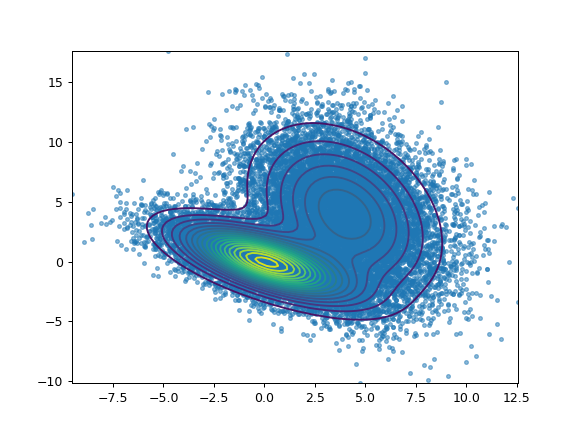

In [8]:
f = Fitter("gaussian2d")

numpy_2d = np.random.multivariate_normal  # to generate our testing dataset

cov = np.array([[6, -3], [-3, 3.5]])
cov1 = np.array([[6, -3], [-3, 15]])

pts =  np.concatenate((numpy_2d([0, 0], cov, size=10000)
                       ,numpy_2d([4, 4], cov1, size=10000)))
x,y = pts[:, 0], pts[:, 1]

f.fit(x,y,n=2)
p = f.getParams()
print(f.par)
print(p)
#print(p.sigma_y_1)

fig2 = plt.figure()
plt.plot(x,y, '.', alpha=0.5)


xg, yg = np.mgrid[x.min():x.max():100j, y.min():y.max():100j]
plt.contour(xg, yg, f.evaluate((xg, yg)), levels=20)

<ValueView x0=0.05706766338551151 x1=-0.046238026019114156 x2=2.8586790315814135 x3=1.213694041235208 x4=1.8046808714322544 x5=3.7314412290439662 x6=1.9932586334503524 x7=4.977198550895979 x8=2.8541178911964122 x9=1.2430194469482827 x10=1.7881910975165236 x11=0.5825881994387471 x12=14.976331672040917 x13=4.998451453839931 x14=-1.2354510186757202 x15=-2.887408156884962 x16=1.7726620588638495 x17=-0.9755069944685325>
vars: [0.05706766338551151, -0.046238026019114156, 2.8586790315814135, 1.213694041235208, 1.8046808714322544, 3.7314412290439662, 1.9932586334503524, 4.977198550895979, 2.8541178911964122, 1.2430194469482827, 1.7881910975165236, 0.5825881994387471, 14.976331672040917, 4.998451453839931, -1.2354510186757202, -2.887408156884962, 1.7726620588638495, -0.9755069944685325], x0_0: 0.05706766338551151, y0_0: -0.046238026019114156, sigma_x_0: 2.8586790315814135, sigma_y_0: 1.213694041235208, amp_0: 1.8046808714322544, theta_0: 3.7314412290439662, x0_1: 1.9932586334503524, y0_1: 4.977

<IPython.core.display.Javascript object>


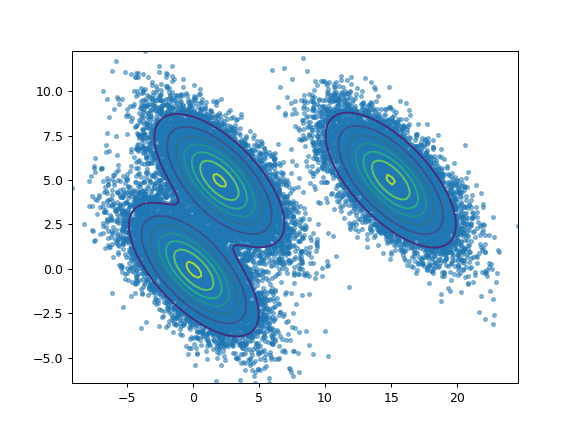

In [12]:
f = Fitter("gaussian2d")

numpy_2d = np.random.multivariate_normal # to generate our testing dataset

cov = np.array([[6, -3], [-3, 3.5]])
pts =  np.concatenate((numpy_2d([0, 0], cov, size=10000)
                       ,numpy_2d([2, 5], cov, size=10000)
                      ,numpy_2d([15, 5], cov, size=10000)))
x,y = pts[:, 0], pts[:, 1]

f.fit(x,y,n=3)
p = f.getParams()
print(f.par)
print(p)
print(p.sigma_x_2)
fig2 = plt.figure()
plt.plot(x,y, '.', alpha=0.5)

xg, yg = np.mgrid[x.min():x.max():100j, y.min():y.max():100j]
plt.contour(xg, yg, f.evaluate((xg, yg)))

(5000,)
<ValueView x0=9.998013711030062 x1=1.0931304147904541 x2=-9.907939088933452>
vars: [9.998013711030062, 1.0931304147904541, -9.907939088933452], a: 9.998013711030062, b: 1.0931304147904541, c: -9.907939088933452
9.998013711030062


<IPython.core.display.Javascript object>


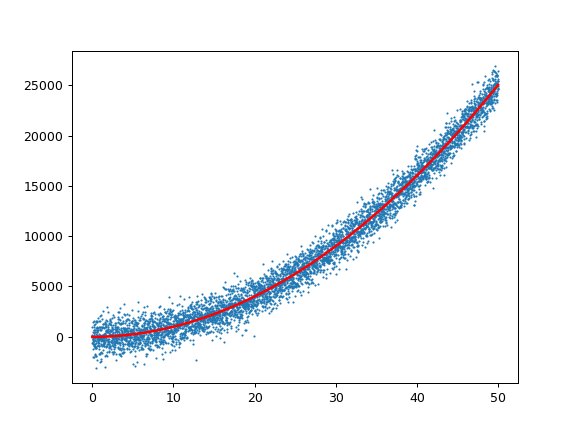

In [13]:
f = Fitter("poly")

p0, p1, p2 = 10, -0.01,3
xx = np.arange(0,50,0.01)

print(xx.shape)
yy = p0*xx**2+p1*xx+p2+np.random.normal(10, 1000, size = xx.shape)

f.fit(xx,yy,p0=3)
p = f.getParams()
print(f.par)
print(p)
print(p.a)

fig2 = plt.figure()

plt.scatter(xx, yy,s=0.5)
plt.plot(xx, f.evaluate(xx),color="r",lw=2)

(10000,)
<ValueView x0=-2.02940048329971 x1=1.9371814637899123 x2=58.802822238652624 x3=-1148.7186121316304>
vars: [-2.02940048329971, 1.9371814637899123, 58.802822238652624, -1148.7186121316304], a: -2.02940048329971, b: 1.9371814637899123, c: 58.802822238652624, d: -1148.7186121316304
-2.02940048329971


<IPython.core.display.Javascript object>


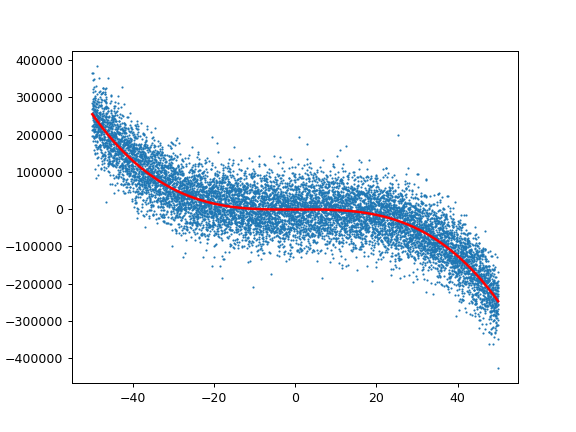

In [14]:
f = Fitter("poly")

p0, p1, p2,p3 = 2, -1,-1,-2
xx = np.arange(-50,50,0.01)

print(xx.shape)
yy = p3*xx**3+p0*xx**2+p1*xx+p2+np.random.normal(100, 50000, size = xx.shape)

f.fit(xx,yy,p0=4)
p = f.getParams()
print(f.par)
print(p)
print(p.a)

fig2 = plt.figure()

plt.scatter(xx, yy,s=0.5)
plt.plot(xx, f.evaluate(xx),color="r",lw=2)